# Hierarchical Clustering

## Library 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## dataset 읽어오기

In [5]:
df = pd.read_csv('../data/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Group                     0
dtype: int64

In [8]:
X = df.loc[:,'Age':]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## Dendrogram 을 그리고, 최적의 클러스터 갯수를 찾아보자.

In [9]:
import scipy.cluster.hierarchy as sch

In [14]:
from koreanize_matplotlib import koreanize
koreanize()

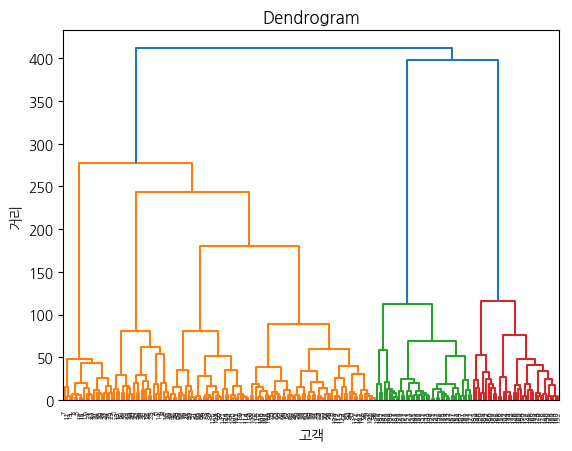

In [15]:
sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('고객')
plt.ylabel('거리')
plt.show()

## Training the Hierarchical Clustering model

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc = AgglomerativeClustering(n_clusters=6)

In [19]:
y_pred = hc.fit_predict(X)

In [20]:
df['Group'] = y_pred

In [27]:
df.loc[df['Group'] == 4,].shape

(23, 6)

In [26]:
df.loc[df['Group'] == 3,]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


## 그루핑 정보를 확인

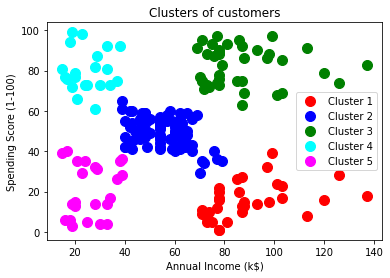

In [5]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 그룹 정보를 데이터셋에 추가

## 마케팅 이메일을 보내기 위해, 3번 그룹의 고객들만 가져와보자. 